In [3]:
# ! pip install perfplot

In [6]:
# ! pip install zarr

Output()

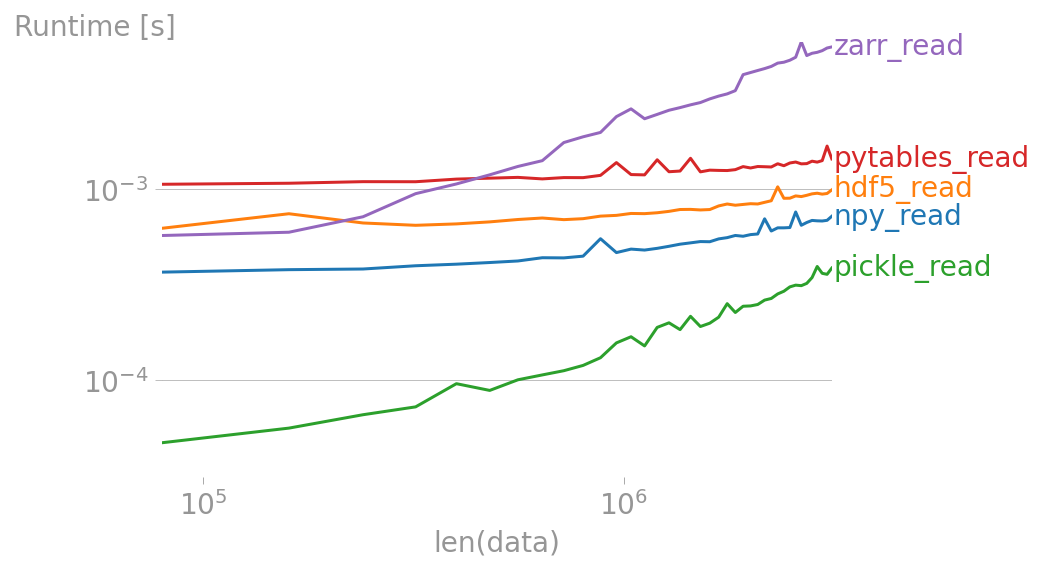

In [15]:
import pickle

import h5py
import numpy
import perfplot
import tables
import zarr


def setup(n):
    data = numpy.random.rand(n // 4).astype(numpy.float32)
    # write all files
    #
    numpy.save("out.npy", data)
    #
    f = h5py.File("out.h5", "w")
    f.create_dataset("data", data=data)
    f.close()
    #
    with open("test.pkl", "wb") as f:
        pickle.dump(data, f)
    #
    f = tables.open_file("pytables.h5", mode="w")
    gcolumns = f.create_group(f.root, "columns", "data")
    f.create_array(gcolumns, "data", data, "data")
    f.close()
    #
    zarr.save("out.zip", data)


def npy_read(data):
    return numpy.load("out.npy")


def hdf5_read(data):
    f = h5py.File("out.h5", "r")
    out = f["data"][()]
    f.close()
    return out


def pickle_read(data):
    with open("test.pkl", "rb") as f:
        out = pickle.load(f)
    return out


def pytables_read(data):
    f = tables.open_file("pytables.h5", mode="r")
    out = f.root.columns.data[()]
    f.close()
    return out


def zarr_read(data):
    return zarr.load("out.zip")


perfplot.show(
    setup=setup,
    kernels=[
        npy_read,
        hdf5_read,
        pickle_read,
        pytables_read,
        zarr_read,
    ],
    n_range=[k * 320000//4 for k in range(40)],
    xlabel="len(data)",
    logx=True,
    logy=True,
)

In [17]:
a = numpy.random.rand(5 * 32000).astype(numpy.float16)

In [18]:
def save_pickle(file_path, data):
    with open(file_path, "wb") as f:
        pickle.dump(data, f)


def load_pickle(file_path):
    with open(file_path, "rb") as f:
        out = pickle.load(f)
    return out

In [20]:
save_pickle('tst.pickle', a)

In [21]:
a = load_pickle('tst.pickle')

In [25]:
! rm out.*

In [26]:
! rm pyta*

In [27]:
! rm test.*

In [28]:
! rm tst.*